Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


## Preparación de datos

In [1]:
#pip install missingno plotly_express


In [2]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
import sklearn.neighbors
from sklearn.impute import KNNImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb
import xgboost as xgb

import missingno as msno
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
#convertir a snake case
def snake_case(nombreColumna):
    nuevo_nombre = ''
    for caracter in nombreColumna:
        if caracter.isupper():
            nuevo_nombre += '_' + caracter.lower()
        else:
            nuevo_nombre += caracter
    return nuevo_nombre.lstrip('_')

data.rename(columns=snake_case, inplace=True)
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [6]:
data.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000



<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
¡Muy bien hecho! Reconozco y aprecio que estés utilizando las funciones info(), head() y describe() en tu análisis. Estas herramientas son esenciales en el campo de la ciencia de datos, ya que nos brindan información valiosa sobre la estructura, los primeros registros y un resumen estadístico de los datos.
</div>

price
0     10772
1      1189
10       84
5        26
2        12
8         9
3         8
9         8
7         3
4         1
Name: count, dtype: int64


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'registration_year'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'power'}>]], dtype=object)

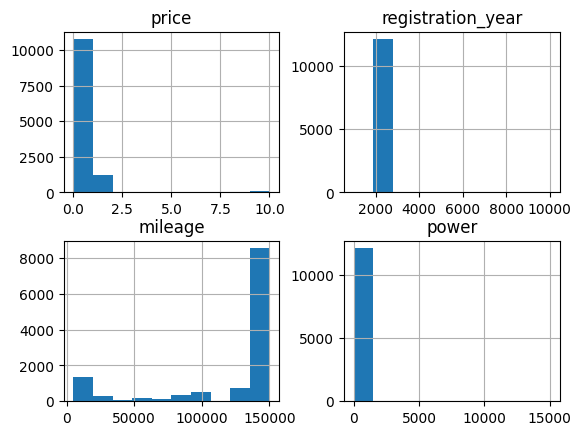

In [7]:
y_zero = data[data["price"]<=10]["price"].value_counts()
print(y_zero)
data[data["price"]<=10][["price", "registration_year", "mileage", "power"]].hist()


<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Buen trabajo con la breve exploración de datos los histogramas nos dan una idea rápida de como se distribuyen nuestros datos. 
</div>

In [8]:
display(data.head(5))

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


De primera mano podemos ver algunos pasos a seguir, el primero de ellos es la eliminación de la columna "number_of_pictures" ya que sus datos están en 0 y realmente no sirve de nada tenerla. Las columnas power, registration_year y price tienen valores atípicos, los descartaremos tomando en cuenta el contexto, la distancia intercuartil e histogramas para visualizar las distribuciones. Para la columna de price mantendremos estos valores ya que es nuestro target, solo eliminaremos los valores en 0 (son menos del 2%). Otro punto a considerar es que las columnas "date_crawled","date_created", "last_seen", "postal_code" y "registration_month" tienen valores que no suponen ninguna ayuda para nuestra característica objetivo, así que las eliminaremos para simplificar el modelo y mejorar la precisión por ser características irrelevantes o poco informativas.

In [9]:
#Eliminamos la características basura 
junk_data =  ["date_crawled","date_created", "last_seen", "postal_code", "registration_month", "number_of_pictures"]
data.drop(junk_data, axis=1, inplace=True)



In [10]:

iqrs = {
    'registration_year': {'Q1': 1999, 'Q3': 2008},
    'power': {'Q1': 69, 'Q3': 143},
    'mileage': {'Q1': 125000, 'Q3': 150000}
}

# iqr para cada columna
for col, values in iqrs.items():
    Q1 = values['Q1']
    Q3 = values['Q3']
    IQR = Q3 - Q1
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    print(f"{col}: Límite inferior = {inf}, Límite superior = {sup}")



registration_year: Límite inferior = 1985.5, Límite superior = 2021.5
power: Límite inferior = -42.0, Límite superior = 254.0
mileage: Límite inferior = 87500.0, Límite superior = 187500.0


Al analizar los rangos, nos damos cuenta que para la columna año el limite superior se considera el 2021, al conocer el contexto de la columna, y desconocer el año en que se obtuvieron los datos, manejaremos el 2024 como limite superior, y respetaremos el limite inferior como corte. Con la columna power para algo parecido, aunque el limite superior obtuvimos un valor de 254 e inferior de -42, el contexto confirma que los valores reales de un vehiculo oscilan entre 80 y 400. Los datos de "mileage" lo dejaremos como están, aunque parezca que tienen un limite superior de 150000


In [11]:
#Descartamos valores atípicos
data = data[(data["registration_year"]<=2024) & (data["power"] >= 80) & (data["power"] <= 400)&(data["price"]>=10)]
display(data.describe())
display(data.head())

,price,registration_year,power,mileage
count,226617.000000,226617.000000,226617.000000,226617.000000
mean,5762.067546,2003.858073,139.471880,130005.913060
std,4810.323761,6.914274,46.795438,35693.093824
min,10.000000,1000.000000,80.000000,5000.000000
25%,1900.000000,2000.000000,105.000000,125000.000000
50%,4200.000000,2004.000000,131.000000,150000.000000
75%,8499.000000,2008.000000,163.000000,150000.000000
max,20000.000000,2019.000000,400.000000,150000.000000


,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN


<Axes: >

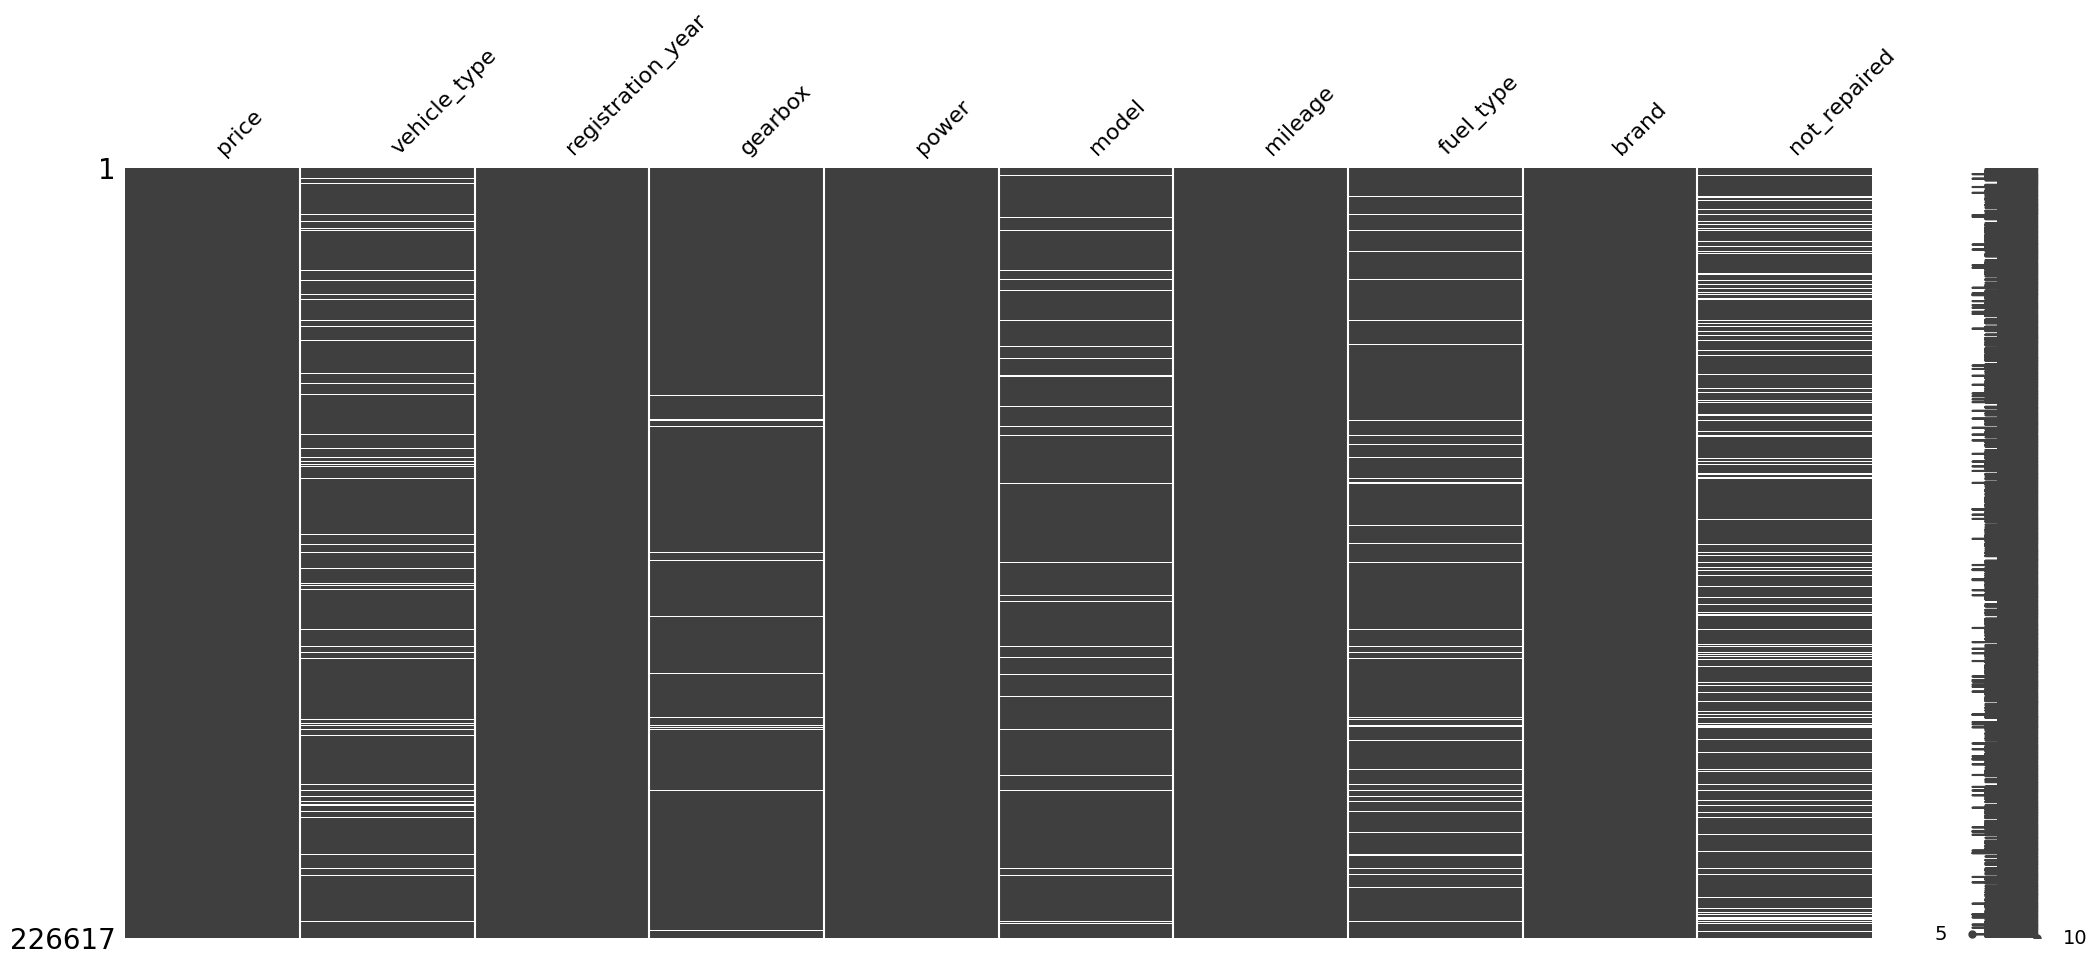

In [12]:
##Matriz de datos ausentes
msno.matrix(data)

Ahora comenzaremos a tratar los valores ausentes, para los casos de las caracteríticas "price","vehicle_type","registration_year","gearbox","model","fuel_type" y "brand" sus datos pueden tener alta correlacion entre ellos, ya que estamos hablando de un contexto de vehículos, así que usaremos un KNNimputer de scikit learn para imputar estos datos ausentes. Para el caso de la característica "not_repaired", no tenemos forma de averiguar si el vehiculo fue reparado o no, así que estableceremos estos valores como "unknown".

In [13]:
#imputación de unknown para not_repaired
data["not_repaired"].replace(np.nan, "unknown" , inplace=True)
data.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'mileage', 'fuel_type', 'brand', 'not_repaired'],
      dtype='object')

In [14]:
#Adecuación de características
categoric =["vehicle_type","gearbox","model","fuel_type","brand", "not_repaired"]
features = data.drop("price", axis=1)
target= data["price"]

df_encoded = pd.get_dummies(features, columns=categoric, drop_first=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns, index=df_encoded.index)

#KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(df_scaled)
df_preprocesed = pd.DataFrame(imputed_data, columns=df_scaled.columns, index=df_scaled.index)
df_preprocesed["price"] = target
#Integrar target a 
print("Valores NaN:", df_preprocesed.isna().sum().sum())
display(df_preprocesed.head())



Valores NaN: 0


,registration_year,power,mileage,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_unknown,not_repaired_yes,price
1,0.992149,0.343750,0.827586,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18300
2,0.985280,0.259375,0.827586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9800
5,0.976447,0.068750,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,650
6,0.985280,0.090625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200
8,0.995093,0.140625,0.172414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14500



<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
¡Muy bien hecho! Reconozco y aprecio que estés utilizando métodos avanzados como el imputador KNN para completgar tus datos. 
</div>

## Entrenamiento del modelo 

In [15]:
np.random.seed(999)

x = df_preprocesed.drop("price", axis=1)
y = df_preprocesed["price"]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state= 999)

#### REGRESION LINEAL

RMSE: 2777.87
Tiempo de entrenamiento: 4.461946725845337 segundos


c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


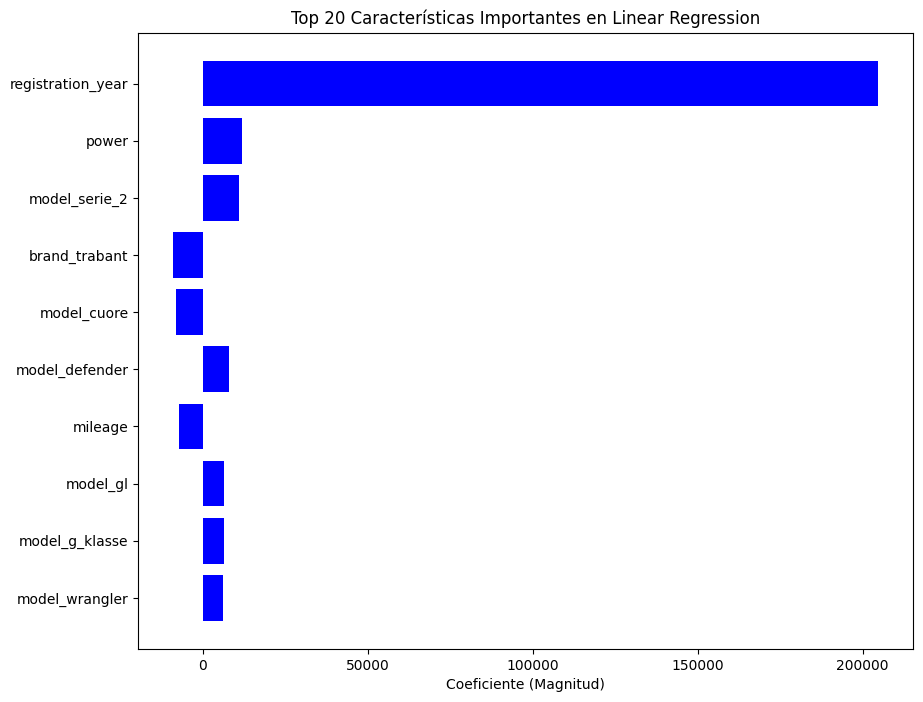

In [16]:
start_time = time.time()
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_valid)
end_time = time.time()

rmse = sklearn.metrics.mean_squared_error(y_valid, lr_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')
print("Tiempo de entrenamiento: %s segundos" % (end_time - start_time))


coefficients = lr_model.coef_
feature_names = x_train.columns

# Ordenar las características por la importancia absoluta de sus coeficientes
indices = np.argsort(abs(coefficients))[::-1]
top_n_indices = indices[:10]

# gráfico de barras para visualizar la importancia de las  características
plt.figure(figsize=(10, 8))
plt.title("Top 20 Características Importantes en Linear Regression")
plt.barh(range(10), coefficients[top_n_indices], color='b', align='center')
plt.yticks(range(10), [feature_names[i] for i in top_n_indices])
plt.xlabel("Coeficiente (Magnitud)")
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.show()


#### BOSQUE ALEATORIO

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 3169.31
Tiempo de entrenamiento: 18.292445182800293 segundos


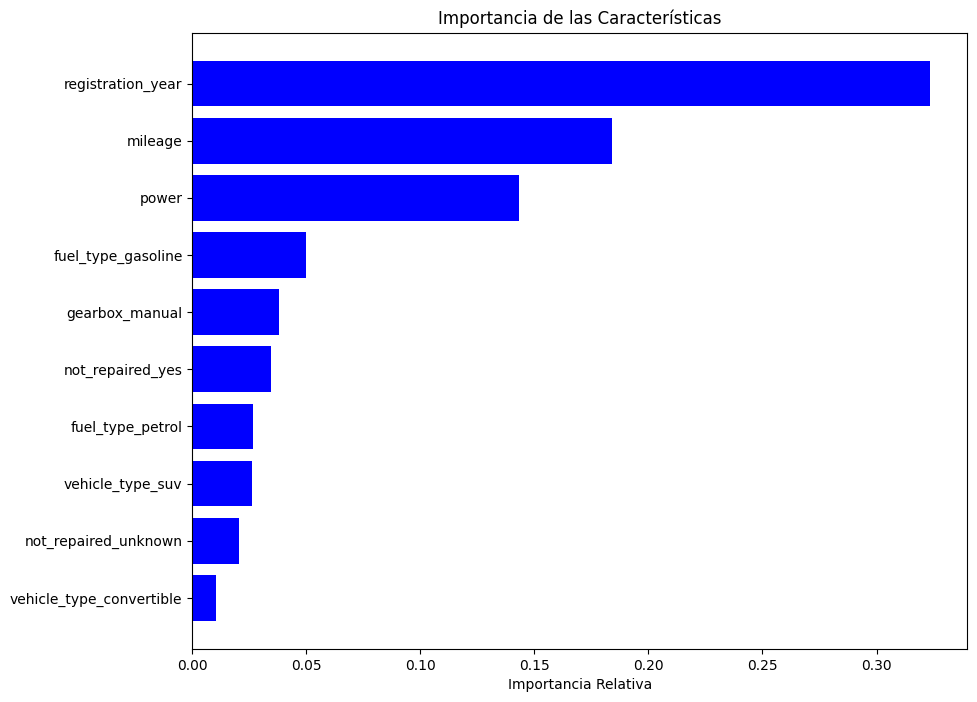

In [17]:
start_time = time.time()
rf_model = RandomForestRegressor(max_features='sqrt', max_depth=10)

rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_valid)
end_time = time.time()

rmse = sklearn.metrics.mean_squared_error(y_valid, rf_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')
print("Tiempo de entrenamiento: %s segundos" % (end_time - start_time))

feature_importances = rf_model.feature_importances_
features = x_train.columns
indices = np.argsort(feature_importances)[-10:]


plt.figure(figsize=(10, 8))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), feature_importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

#### LIGHTGBM

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 3.72372e+06	valid_0's l1: 1309.61
RMSE: 1929.70
Tiempo de entrenamiento: 3.9155609607696533 segundos


c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

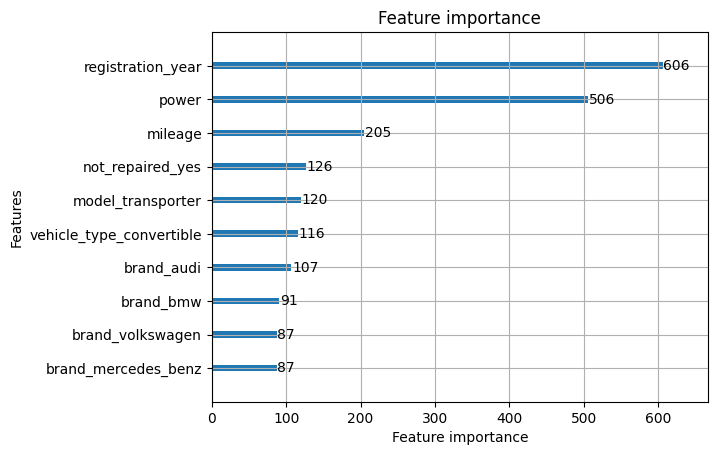

In [18]:
"""
docs:
https://lightgbm.readthedocs.io/en/latest/Parameters.html
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
"""
start_time = time.time()
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid,y_valid)

lgb_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0,
}

lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval, callbacks=[lgb.early_stopping(stopping_rounds=5)])

lgb_predictions = lgb_model.predict(x_valid, num_iteration=lgb_model.best_iteration)
end_time = time.time()
rmse = sklearn.metrics.mean_squared_error(y_valid, lgb_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')
print("Tiempo de entrenamiento: %s segundos" % (end_time - start_time))

#Grafico de features mas importantes
feature_importances = lgb_model.feature_importance(importance_type='split')
feature_names = lgb_model.feature_name()

plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, importance_type='split', max_num_features=10)
plt.show()

#### XGBOOST

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2085.20
Tiempo de entrenamiento: 8.336699485778809 segundos


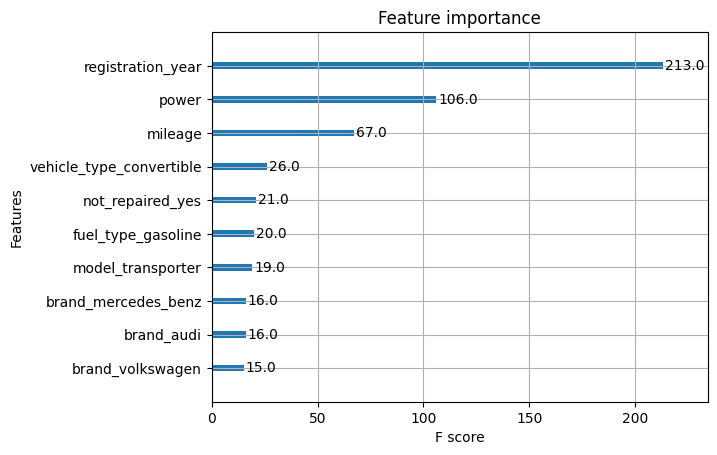

In [19]:
start_time = time.time()

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

xgb_model.fit(x_train, y_train)

xgb_predictions = xgb_model.predict(x_valid)
end_time = time.time()

rmse = sklearn.metrics.mean_squared_error(y_valid, xgb_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')
print("Tiempo de entrenamiento: %s segundos" % (end_time - start_time))

#Grafico de features mas importantes
xgb.plot_importance(xgb_model, max_num_features= 10)
plt.show()

#### CATBOOST

0:	learn: 4711.8105009	total: 162ms	remaining: 2m 42s


200:	learn: 2079.9204881	total: 5.15s	remaining: 20.5s
400:	learn: 1962.5174488	total: 9.57s	remaining: 14.3s
600:	learn: 1902.5830803	total: 13.7s	remaining: 9.11s
800:	learn: 1862.6056761	total: 18.1s	remaining: 4.5s
999:	learn: 1832.8808467	total: 22.9s	remaining: 0us
RMSE: 1842.70
Tiempo de entrenamiento: 24.563028573989868 segundos


c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


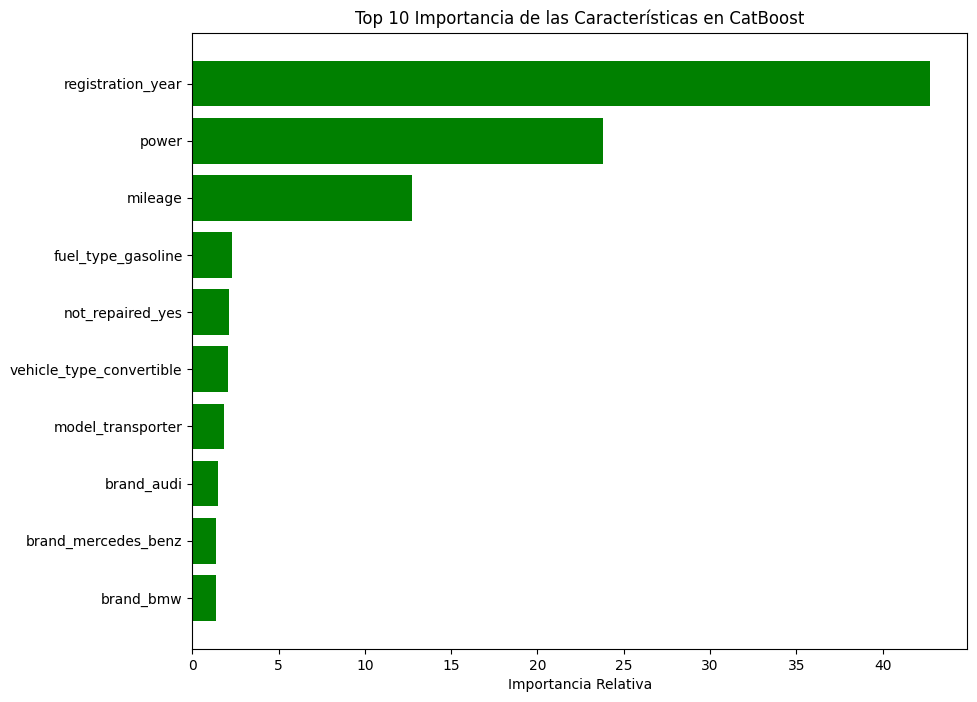

In [20]:
start_time = time.time()

cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    verbose=200
)

cat_model.fit(x_train, y_train)
cat_predictions = cat_model.predict(x_valid)
end_time = time.time()


rmse = sklearn.metrics.mean_squared_error(y_valid, cat_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')
print("Tiempo de entrenamiento: %s segundos" % (end_time - start_time))



feature_importances = cat_model.get_feature_importance()
features = x_train.columns

indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(10, 8)) 
plt.title('Top 10 Importancia de las Características en CatBoost')
plt.barh(range(len(indices)), feature_importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()


<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Excelente trabajo. L a implementación de los modelos es adecuada. Además es muy imoprtante siempre mostrar la importancia de las características, esto nos permitirá a futuro afinar más nuestros modelos. 
</div>

## Análisis del modelo

#### REGRESION LINEAL

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2777.87


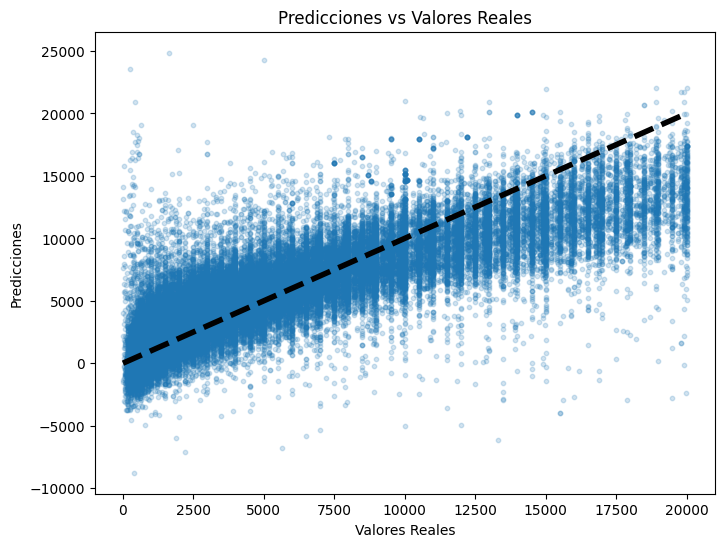

In [21]:
rmse = sklearn.metrics.mean_squared_error(y_valid, lr_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, lr_predictions, s=10, alpha=0.2)  # Ajustar el tamaño y la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Dibujar la línea diagonal
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

plt.show()

#### BOSQUE ALEATORIO

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 3169.31


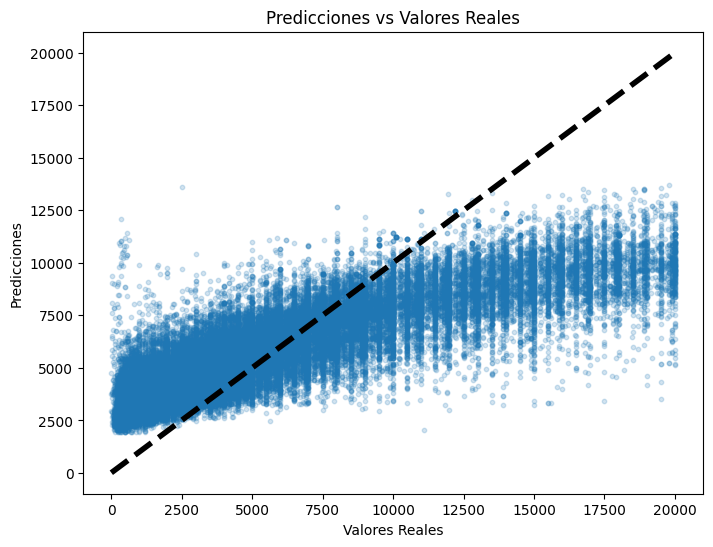

In [22]:
rmse = sklearn.metrics.mean_squared_error(y_valid, rf_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, rf_predictions, s=10, alpha=0.2)  # Ajustar el tamaño y la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Dibujar la línea diagonal
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

plt.show()

#### LIGHTGBM

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1929.70


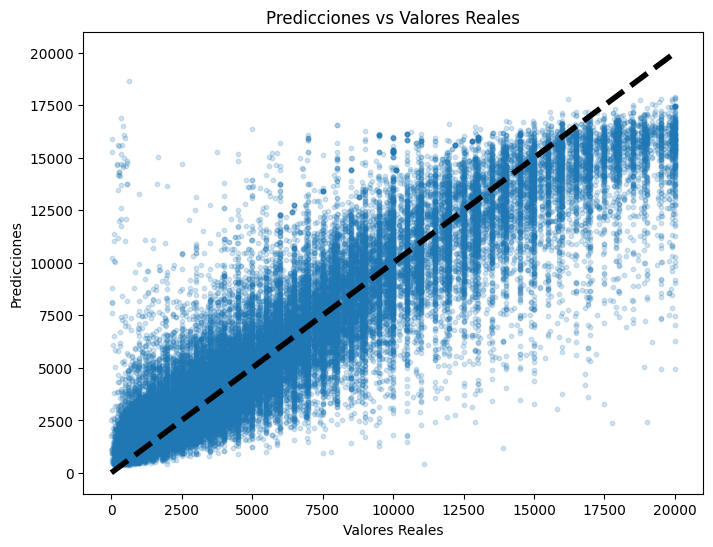

In [23]:
rmse = sklearn.metrics.mean_squared_error(y_valid, lgb_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, lgb_predictions, s=10, alpha=0.2)  # Ajustar el tamaño y la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Dibujar la línea diagonal
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

plt.show()

#### XGBOOST

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2085.20


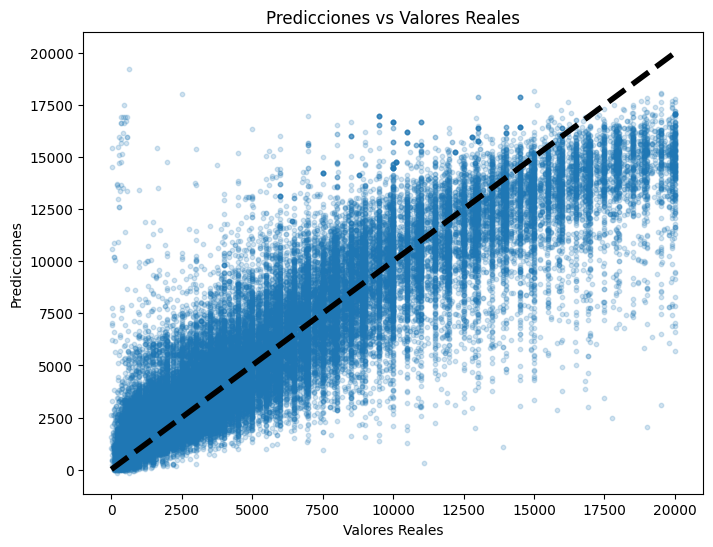

In [24]:
rmse = sklearn.metrics.mean_squared_error(y_valid, xgb_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, xgb_predictions, s=10, alpha=0.2)  # Ajustar el tamaño y la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Dibujar la línea diagonal
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

plt.show()

#### CATBOOST

c:\Users\Jorge Armando\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1842.70


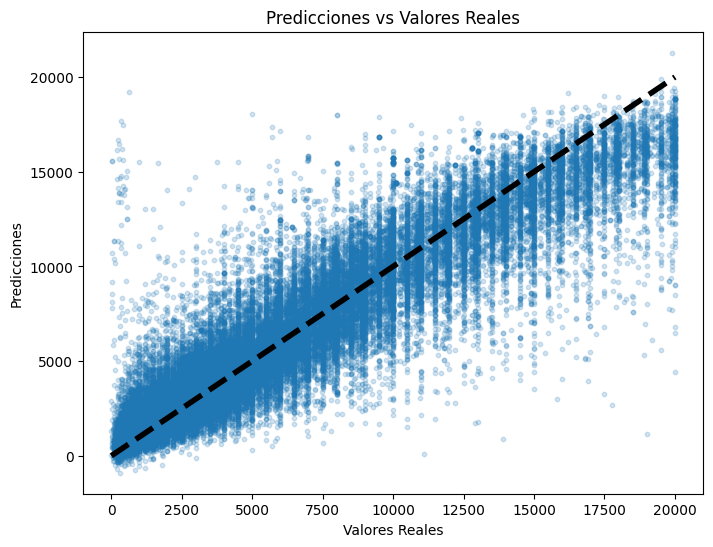

In [25]:
rmse = sklearn.metrics.mean_squared_error(y_valid, cat_predictions, squared=False)
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, cat_predictions, s=10, alpha=0.2)  # Ajustar el tamaño y la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Dibujar la línea diagonal
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

plt.show()

### CONCLUSIONES

En este proyecto trabajamos con un conjunto de datos de vehículos, donde nuestra variable objetivo era el precio del vehículo, sin embargo, en el camino a encontrar el mejor modelo se presentaron algunos obstáculos, sobretodo de datos ausentes y valore atípicos, los datos ausentes notamos que prácticamente todos estaban relacionados, al ser características específicas del modelo, se podían encontrar con algún otro registro del mismo modelo, por lo que elegimos un KNN imputer como mejor opción para imputar estos datos ausentes. Respecto a los valores atípicos, tuvimos un criterio de tomar datos 1.5 veces el rango intercuartílico superior e inferior, sin embargo, también tomamos como criterio la coherencia de los datos, por ejemplo, establecimos como valor máximo el año de registro en 2024, al desconocer la fecha de adquisición de los datos. Con respecto al desarrollo de modelos, pudimos trabajar con nuevos algoritmos, como son los de la familia de gradient boosting, con ellos notamos un considerable amuento de la eficiencia en los entrenamientos y las predicciones, algo muy importante en algoritmos avanzados de machine learning.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

¡Felicidades por completar esta sección con éxito! Has hecho un gran trabajo. Los valores esperados para esta sección se han cumplido con éxito gracias a tu dedicación y esfuerzo. Continúa así y sigue aprendiendo, ¡estoy seguro de que tendrás éxito en todo lo que te propongas!</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Será necesario incluir una sección de conclusiones finales, además recuerda que el proyecto solicita ciertos aspectos sobre la evluación en tiempo de los modelos.  </div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Hola! muchas gracias por las observaciones :) solo no pude encontrar alguna forma de incluir la tabla de contenidos de manera eficiente sin alguna libreria externa, ya previamente he querido instalar algunas pero no tengo los permisos en la plataforma. De igual forma, creo que las demas correcciones quedaron listas.

Saludos! :) 

</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Es fundamental evaluar no solo la calidad de los modelos, sino también su velocidad de predicción y el tiempo necesario para el entrenamiento. Esta información es crucial para seleccionar el modelo más adecuado, considerando no solo su precisión sino también su eficiencia en términos de tiempo y recursos computacionales. Te recomiendo emplear la librería <code>time</code> de Python para medir el tiempo de entrenamiento de tus modelos. Puedes hacerlo envolviendo tu código de entrenamiento con <code>start_time = time.time()</code> antes del entrenamiento y <code>print("Tiempo de entrenamiento: %s segundos" % (time.time() - start_time))</code> después del entrenamiento. <br><br> Además, Jupyter Notebooks ofrece una herramienta útil llamada <i>magic cells</i>, que te permite medir el tiempo de ejecución de una celda usando <code>%%time</code> al inicio de la celda. Esto puede ser particularmente útil para comparar la eficiencia de diferentes modelos de manera rápida y sencilla. <br><br> Lamentablemente, sin esta información clave, no podemos proceder a aprobar el proyecto. Te animo a implementar estas mediciones y a considerar el tiempo de entrenamiento como un factor crucial en la selección de tu modelo final. Si tienes alguna duda sobre cómo implementar estas mediciones, no dudes en preguntar.
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos